In [1]:
!python tests.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.006s

OK


### 3.3 Метод Ньютона: постоянный шаг vs линейный поиск (2 балла)

In [1]:
import methods
from methods import LBFGS, Newton, BFGS, LBFGS, LineSearchTool
import oracles
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt
import pickle
from sklearn import datasets
from numpy.linalg import norm

In [2]:
def init_oracle(data):
    """Returns logistic regression oracle and feature space dimensionality"""
    A = data[0].toarray()
    print(type(A))
    b = data[1]
    m = A.shape[0]
    n = A.shape[1]
    print(f"m = {m}, n = {n}")
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    return oracle, n

def optimize(oracle, n, line_search_options, tolerance=1e-4, max_iter = 10):
    x0 = np.zeros(n)    
    _, _, history = Newton(oracle, x0, tolerance=tolerance,line_search_options=line_search_options).run(max_iter)
    
    return history
def get_iter_num(history):
    return len(history['func']) - 1


def make_func_vals_plot(history_gd, history_n, file_pref):
    gd_iter = get_iter_num(history_gd)
    h_iter = get_iter_num(history_n)
    plt.plot(history_gd['time'], history_gd['func'], label="Const, iter = {}".format(gd_iter))
    plt.plot(history_n['time'], history_n['func'], label="Wolfe, iter = {}".format(h_iter))
    plt.legend(loc='best')
    plt.xlabel("time(s)")
    plt.ylabel("function value")
    plt.show()
    
def make_func_vals_plot_iters(history_gd, history_n, file_pref):
    gd_iter = get_iter_num(history_gd)
    gd_iters = np.arange(gd_iter+1)
    h_iter = get_iter_num(history_n)
    h_iters = np.arange(h_iter+1)
    
    plt.plot(gd_iters, history_gd['func'], label="Const, iter = {}".format(gd_iter))
    plt.plot(h_iters, history_n['func'], label="Wolfe, iter = {}".format(h_iter))
    plt.legend(loc='best')
    plt.xlabel("iter number")
    plt.ylabel("function value")
    plt.show()

In [19]:
def run_dataset_experiment(dataset, file_pref, tolerance=1e-8,max_iter=10):    
    st_time = time.time()
    print("Initiating oracle")
    oracle, n = init_oracle(dataset)
    print("Done. Took {} s".format(time.time() - st_time))    
    st_time = time.time()
    print("Starting gradient descent")
    optParamDict = {'method': 'Constant',
                    'c' : 1}
    params = methods.get_line_search_tool(optParamDict)
    history_grad_descent = optimize(oracle, n,line_search_options= params, tolerance = tolerance)
    print("Done. Took {} s".format(time.time() - st_time))    
    st_time = time.time()
    print("Starting newton optimization")
    optParamDict = {'method': 'Wolfe'}
    params = methods.get_line_search_tool(optParamDict)
    history_newton = optimize(oracle, n, line_search_options=params, tolerance = tolerance)
    print("Done. Took {} s".format(time.time() - st_time))    
    make_func_vals_plot(history_grad_descent, history_newton, file_pref)
    make_func_vals_plot_iters(history_grad_descent, history_newton, file_pref)

Initiating oracle
<class 'numpy.ndarray'>
m = 32561, n = 123
Done. Took 0.013556957244873047 s
Starting gradient descent
Done. Took 0.20859003067016602 s
Starting newton optimization


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Done. Took 0.309345006942749 s


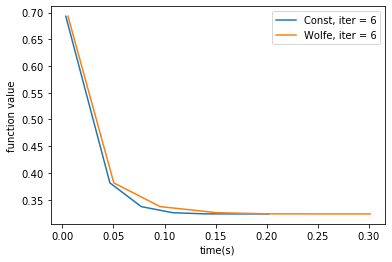

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


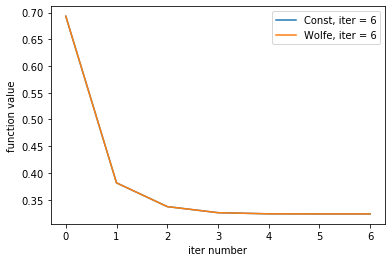

In [20]:
run_dataset_experiment(datasets.load_svmlight_file('data/a9a.txt'),'qwer')

Initiating oracle
<class 'numpy.ndarray'>
m = 6000, n = 5000
Done. Took 0.1745128631591797 s
Starting gradient descent
Done. Took 25.067956924438477 s
Starting newton optimization


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Done. Took 28.00725507736206 s


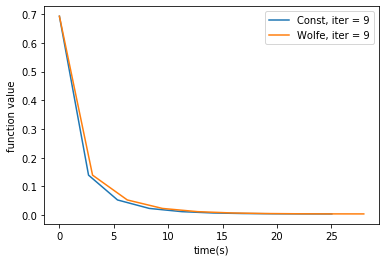

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


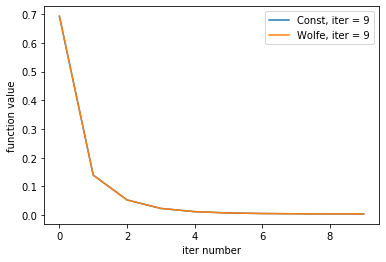

In [21]:
run_dataset_experiment(datasets.load_svmlight_file('data/gisette_scale'),'qwer')

In [105]:
data = datasets.load_svmlight_file('data/a9a.txt')

In [106]:
A = data[0].toarray()
print(type(A))
b = data[1]
m = A.shape[0]
n = A.shape[1]
print(f"m = {m}, n = {n}")
x0 = np.zeros(n) 
oracle = oracles.create_log_reg_oracle(A, b, 1/m)

<class 'numpy.ndarray'>
m = 32561, n = 123


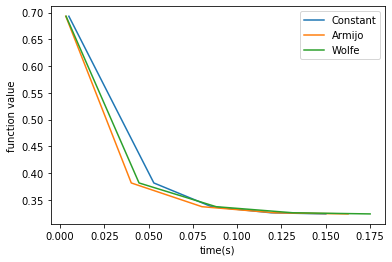

In [107]:
histories=[]
optParamDict = {'method': None}#'c' : 1,'c1':1e-3,'c2':0.1,'alpha_0':0.9
for method in ['Constant', 'Armijo', 'Wolfe']:
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    optParamDict['method'] = method
    params = methods.get_line_search_tool(optParamDict)
    _,_, history = Newton(oracle,x0,line_search_options=params).run(10)
    histories.append(history)
    gd_iter = get_iter_num(history)
    plt.plot(history['time'], history['func'], label="{}".format(method))
    plt.legend(loc='best')
    plt.xlabel("time(s)")
    plt.ylabel("function value")
plt.show()
    

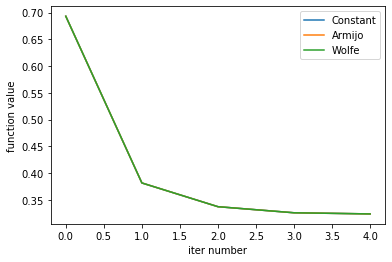

In [108]:
for hist,method in zip(histories,['Constant', 'Armijo', 'Wolfe']):   
    plt.plot(hist['func'], label="{}".format(method))
    plt.legend(loc='best')
    plt.xlabel("iter number")
    plt.ylabel("function value")
plt.show()
    

In [39]:
data = datasets.load_svmlight_file('data/gisette_scale')

In [32]:
A = data[0].toarray()
print(type(A))
b = data[1]
m = A.shape[0]
n = A.shape[1]
print(f"m = {m}, n = {n}")
x0 = np.zeros(n) 
oracle = oracles.create_log_reg_oracle(A, b, 1/m)

<class 'numpy.ndarray'>
m = 6000, n = 5000


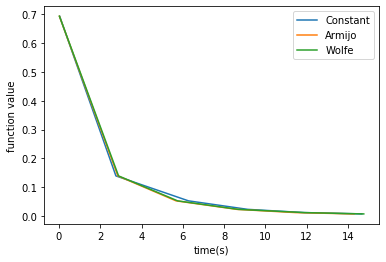

In [34]:
histories=[]
optParamDict = {'method': None,
                    'c' : 1,'c1':1e-3,'c2':1,'alpha_0':0.1}
for method in ['Constant', 'Armijo', 'Wolfe']:
    optParamDict['method'] = method
    params = methods.get_line_search_tool(optParamDict)
    _,_, history = Newton(oracle,x0,line_search_options=params).run(10)
    histories.append(history)
    gd_iter = get_iter_num(history)
    plt.plot(history['time'], history['func'], label="{}".format(method))
    plt.legend(loc='best')
    plt.xlabel("time(s)")
    plt.ylabel("function value")
plt.show()

### 3.4 L-BFGS: зависимость от размера истории (2 балла)

In [ ]:
dataset = datasets.load_svmlight_file("data/gisette_scale")

a9a.txt
Size = 1, time~0.3961327075958252
Size = 2, time~0.38800692558288574
Size = 5, time~0.35905003547668457
Size = 10, time~0.3001279830932617
Size = 20, time~0.32589077949523926
Size = 50, time~0.3186678886413574
Size = 100, time~0.31696486473083496
Size = 200, time~0.3502638339996338


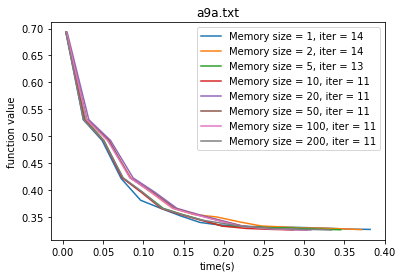

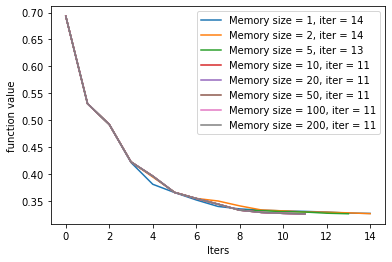

gisette_scale
Size = 1, time~14.762854099273682
Size = 2, time~9.483530759811401
Size = 5, time~5.672703981399536
Size = 10, time~5.059834718704224
Size = 20, time~6.3617262840271
Size = 50, time~4.64096212387085
Size = 100, time~4.781975030899048
Size = 200, time~4.330341100692749


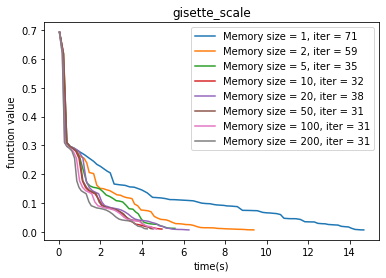

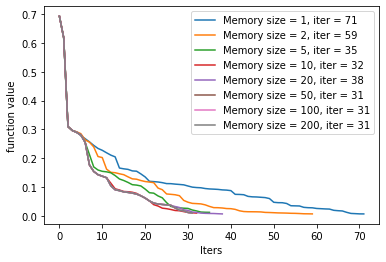

real-sim
Size = 1, time~1.0157499313354492
Size = 2, time~1.0152809619903564
Size = 5, time~0.7524659633636475
Size = 10, time~0.8159809112548828
Size = 20, time~0.7950060367584229
Size = 50, time~0.7572588920593262
Size = 100, time~0.8155930042266846
Size = 200, time~0.7580571174621582


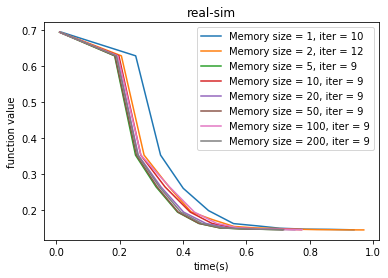

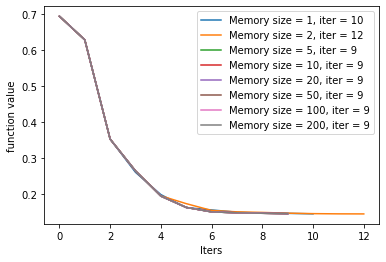

In [120]:
for data in ['a9a.txt','gisette_scale','real-sim']:
    dataset = datasets.load_svmlight_file(f"data/{data}")
    if data == 'real-sim':
        A = dataset[0]
    else:
        A = dataset[0].toarray()
    b = dataset[1]
    m = A.shape[0]
    n = A.shape[1]
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)  
    res ={}
    sizes = [1,2,5,10,20,50,100,200]
    tol = 1e-4
    oracle = oracles.create_log_reg_oracle(A, b, 1/m)
    x0 = np.zeros(n)
    print(data)
    for m_size in sizes:     
        st_time = time.time()
        _,_,res[m_size] = LBFGS(oracle, x0, tolerance=tol, memory_size=m_size).run(100)
        print(f"Size = {m_size}, time~{time.time() - st_time}")
    #plt.figure(figsize=(6,6))
    for m_size, history in res.items():
        iterations = get_iter_num(history)
        plt.plot(history['time'], history['func'], label="Memory size = {}, iter = {}".format(m_size, iterations))        
        plt.legend(loc='best')
        plt.xlabel("time(s)")
        plt.ylabel("function value")
    plt.title(data)    
    plt.show()
    #plt.figure(figsize=(6,6))
    for m_size, history in res.items():
        iterations = get_iter_num(history)
        plt.plot( history['func'], label="Memory size = {}, iter = {}".format(m_size, iterations))        
        plt.legend(loc='best')
        plt.xlabel("Iters")
        plt.ylabel("function value")
    plt.show()